# **NAME : YOGESHWARI A**
## **TASK 1**: Implementing a simple linear regression

## **Problem Statement**
### Predict the percentage of an student based on the no.of study hours

## **Feature Description**
1. **Hours**: The number of hours student studied in a day. This is the independent/explanatory variable.
2.**Scores**: Percentage of marks obtained by students corresponding to number of hours. This is the dependent/target variable

## **Preprocessing steps**



**1. Import  necessary libraries**

In [ ]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**2.Import the Dataset**

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.shape
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **3. Visualize th dataset**

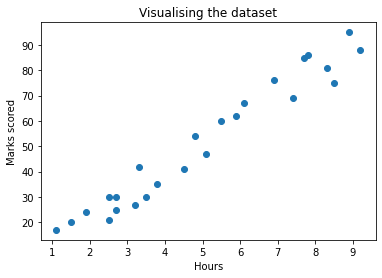

In [ ]:
#Plot a scatterplot between hors and score
plt.scatter(data['Hours'],data['Scores'])

#Name the scatterplot
plt.title("Visualising the dataset")

#Nmae the x axis label
plt.xlabel('Hours')

#Name the y axis label
plt.ylabel("Marks scored")

#Show the scatterplot
plt.show()

From the scatterplot it is clear that Hours and Marks scored are positively correlated . As the number of study hours increases the marks scored also increases .

### **4.Check for any missing values** 

In [ ]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

## **Building linear regression model**

### **1. Specify the independent and dependent variables**

In [ ]:
#Drop the target variable column and store the rest as explanatory variable
X_data = data.drop("Scores",axis=1)

#Store the target variable 
Y_data = data["Scores"]

#Explanatory_variable description
X_data.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
#Target variable description
Y_data.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### **2. Split the dataset into train set and test set**

In [ ]:
#import train_test_split from sci-kit learn library
from sklearn.model_selection import train_test_split

#Split the data into training set and testing set in the ration 0.7:0.3
X_train,X_test,y_train,y_test = train_test_split(X_data,Y_data,test_size = 0.3,random_state = 0)

### **3. Linear Regression Model**

In [ ]:
#Import LinearReression model from sci-kit learn
from sklearn.linear_model import LinearRegression

#Instantiate a regressor
regressor = LinearRegression()

#Fit the model to training data set
reg_fit = regressor.fit(X_train,y_train)

### **4.Visualize data for trainset and testset**

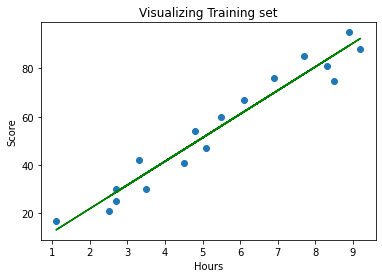

In [ ]:
#Visualize for trainset
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),color = "green")
plt.title('Visualizing Training set')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

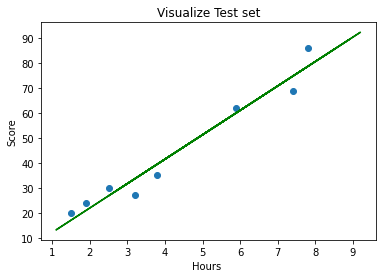

In [ ]:
#Visualize Test set
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train),color = "green")
plt.title('Visualize Test set')
plt.xlabel('Hours ')
plt.ylabel('Score')
plt.show()

### **5.Prediction for test set**

In [ ]:
#Predict the test set
pred_test = reg_fit.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})  
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


### **6.Evaluating the model**

In [ ]:
# Checking r2_score

r2_score=reg_fit.score(X_train,y_train)
print("The R-Squared value: ",round(r2_score,3))

The R-Squared value:  0.948


The r-squared value is 0.948 or 94.8%. This indicates that the target variable is able to explain 94 % of the variance due to independent variable


### **7.Predicting the score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours_day=9.25
hours_day=np.array(hours_day).reshape(1, -1)
print("The predicted score if a student studies",hours_day[0][0],"hours in a day is:",round(reg_fit.predict(hours_day)[0],2))

The predicted score if a student studies 9.25 hours in a day is: 92.92
